# Problem Statement:
 Predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.

# Steps to follow:
1. How to get the data
2. PreProcessing
3. Build a Model
4. Compile 
5. Fit 
6. Experimentation

1. How to get Data

In [72]:
data_dir = "assets/Plant_images/"


In [73]:
data_dir

'assets/Plant_images/'

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    print(f"Image Shape:{img.shape}")

    return img


Image Shape:(256, 256, 3)


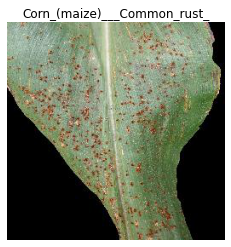

In [75]:
img = view_random_image(data_dir,'Corn_(maize)___Common_rust_')
plt.imshow(img)

2. Preprocessing Data:

            * Preprocessing
            
            * Data Augmentation

            * Splitting Data into Training and Test sets

In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2)

train_data = train_datagen.flow_from_directory(data_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='training')


test_data = train_datagen.flow_from_directory(data_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation')


Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


3. Building a Model 

    Sequential -> CNN -> CNN -> MaxPool -> CNN -> CNN -> MaxPool -> Dense


In [77]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    layers.Conv2D(50,3,input_shape=(224,224,3),activation='relu'),
    layers.Conv2D(40,3,activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(30,3,activation='relu'),
    layers.Conv2D(20, 3, activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(10,3,activation='relu'),
    layers.Conv2D(5, 3, activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),

    layers.Dense(3,activation='softmax')

])



In [78]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )


In [79]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 222, 222, 50)      1400      
                                                                 
 conv2d_61 (Conv2D)          (None, 220, 220, 40)      18040     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 110, 110, 40)     0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 108, 108, 30)      10830     
                                                                 
 conv2d_63 (Conv2D)          (None, 106, 106, 20)      5420      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 53, 53, 20)       0         
 g2D)                                                

In [80]:
history_1 = model_1.fit(train_data,
            epochs=5,
            validation_data=test_data
            )

Epoch 1/5
23/23 [==============================] - 14s 389ms/step - loss: 0.9725 - accuracy: 0.4833 - val_loss: 0.6045 - val_accuracy: 0.7333
Epoch 2/5
23/23 [==============================] - 4s 175ms/step - loss: 0.3239 - accuracy: 0.8736 - val_loss: 0.1532 - val_accuracy: 0.9500
Epoch 3/5
23/23 [==============================] - 4s 174ms/step - loss: 0.1037 - accuracy: 0.9736 - val_loss: 0.1007 - val_accuracy: 0.9611
Epoch 4/5
23/23 [==============================] - 4s 174ms/step - loss: 0.0494 - accuracy: 0.9819 - val_loss: 0.0500 - val_accuracy: 0.9778
Epoch 5/5
23/23 [==============================] - 4s 174ms/step - loss: 0.0300 - accuracy: 0.9889 - val_loss: 0.0213 - val_accuracy: 0.9944


<AxesSubplot:>

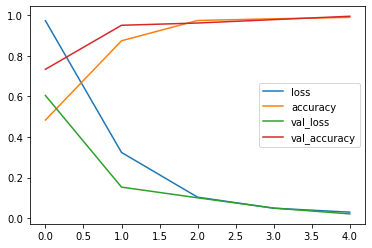

In [81]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

In [98]:
def custom_hist_fun(history):
    loss =history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = [i for i in range(1,6)]

    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label='Training_Loss')
    plt.plot(epochs,val_loss,label='Validation_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss') 
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(accuracy,label='Training_Accuracy')
    plt.plot(val_accuracy,label='Validation_Accuracy')  
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy') 
    plt.title('Accuracy Curve')
    plt.legend()
  
    plt.suptitle('Loss vs Accuracy Curve')


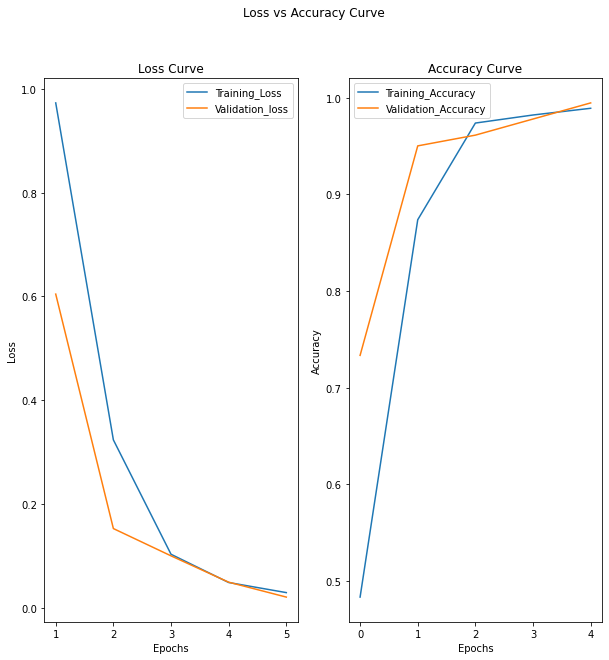

In [99]:
custom_hist_fun(history_1)